<h3>Zadanie 1</h3>

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

url = r'https://extranet.who.int/tme/generateCSV.asp?ds=mdr_estimates'
df = pd.read_csv(url)
df.head(5)

,country,iso2,iso3,iso_numeric,g_whoregion,year,source_rr_new,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,source_rr_ret,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_inc_rr_num,e_inc_rr_num_lo,e_inc_rr_num_hi,e_rr_in_notified_labconf_pulm,e_rr_in_notified_labconf_pulm_lo,e_rr_in_notified_labconf_pulm_hi
0,Afghanistan,AF,AFG,4,EMR,2015,Model,4.8,0.42,19.0,Surveillance,6.0,4.1,8.3,3400,0,9800,800.0,70.0,3100.0
1,Afghanistan,AF,AFG,4,EMR,2016,Model,4.7,0.45,17.0,Surveillance,8.1,6.1,10.0,3400,0,9500,880.0,0.0,2400.0
2,Afghanistan,AF,AFG,4,EMR,2017,Model,4.6,0.48,17.0,Surveillance,11.0,9.0,13.0,3400,0,9500,1100.0,0.0,2700.0
3,Afghanistan,AF,AFG,4,EMR,2018,Model,4.5,0.51,17.0,Surveillance,14.0,13.0,16.0,3500,0,9800,1200.0,0.0,2900.0
4,Afghanistan,AF,AFG,4,EMR,2019,Model,4.4,0.53,17.0,Surveillance,19.0,17.0,20.0,3500,0,9900,1200.0,0.0,3200.0


In [2]:
df['e_rr_pct_new'].describe()

count    1720.000000
mean        3.725372
std         5.751976
min         0.260000
25%         1.300000
50%         2.100000
75%         3.300000
max        40.000000
Name: e_rr_pct_new, dtype: float64

<h3>Zadanie 2</h3>

In [3]:
import statistics

df = pd.read_csv('pliki_csv/Wzrost.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,156,158,167,188,197,167,197,178,186,157,198,199,178,168,156,151,167,167


In [4]:
wzrost = list(df.loc[0])
wzrost

[156,
 158,
 167,
 188,
 197,
 167,
 197,
 178,
 186,
 157,
 198,
 199,
 178,
 168,
 156,
 151,
 167,
 167]

In [7]:
print('Górna granica mediany:', statistics.median_high(wzrost))
print('Dolna granica mediany:', statistics.median_low(wzrost))
print('Wartości najczęściej występujące:', statistics.mode(wzrost))
print('Wariancja:', statistics.variance(wzrost))
print('Odchylenie standardowe:', statistics.stdev(wzrost))

Górna granica mediany: 168
Dolna granica mediany: 167
Wartości najczęściej występujące: 167
Wariancja: 269.6764705882353
Odchylenie standardowe: 16.42182908777933


Wariancja (variance) to średnia arytmetyczna kwadratów odchyleń wartości od średniej arytmetycznej. Jest to miara, która opisuje, jak bardzo dane różnią się od średniej. Wariancja to suma różnic wartości_średniej do wartości aktualnej podniesionych do kwadratu i podzielona przez liczbę wartości.

Odchylenie standardowe (standard deviation) to pierwiastek kwadratowy wariancji. Jest to miara rozproszenia danych, wyrażona w tych samych jednostkach co dane. Wzór na odchylenie standardowe to: odchylenie standardowe. Odchylenie standardowe to pierwiastek kwadratowy z wariancji.

<h3>Zadanie 3</h3>

In [11]:
from scipy import stats

# zbiór danych pobrany z https://www.kaggle.com/datasets/raunakpandey030/nba-player-stats
df = pd.read_csv('pliki_csv/NBA_Player_Stats.csv')
df.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [25]:
wartosc_numeryczne = df.iloc[:, 5:len(df.columns)-1]
wartosc_numeryczne

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,31,0,17.1,3.3,8.8,0.377,0.2,1.0,0.161,3.2,...,1.000,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3
1,59,16,16.3,2.4,6.1,0.403,0.1,0.3,0.211,2.4,...,0.672,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4
2,82,82,36.0,8.0,16.4,0.485,0.3,0.6,0.412,7.7,...,0.784,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3
3,60,22,21.6,2.9,6.7,0.428,1.1,2.9,0.375,1.8,...,0.784,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1
4,37,3,13.5,1.6,3.9,0.414,0.5,1.7,0.313,1.1,...,0.676,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14568,26,0,18.3,2.6,5.5,0.465,0.7,1.7,0.395,1.9,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
14569,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
14570,56,12,12.6,2.3,4.4,0.526,0.0,0.2,0.091,2.3,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
14571,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,1.9,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [43]:
statystki_opisowe = stats.describe(wartosc_numeryczne)
print('\nWartość minimalna:', statystki_opisowe.minmax[0])
print('\nWartość maksymalna:', statystki_opisowe.minmax[1])
print('\nśrednia:', statystki_opisowe.mean)
print('\nWariancja:', statystki_opisowe.variance)
print('\nKurtoza:', statystki_opisowe.skewness)
print('\nSkośność:', statystki_opisowe.kurtosis)


Wartość minimalna: [ 1.  0.  0.  0.  0. nan  0.  0. nan  0.  0. nan nan  0.  0. nan  0.  0.
  0.  0.  0.  0.  0.  0.  0.]

Wartość maksymalna: [85.  83.  43.7 12.2 27.8  nan  5.3 13.2  nan 12.1 23.4  nan  nan 10.3
 13.1  nan  6.8 12.  18.  12.8  3.   6.   5.7  6.  36.1]

średnia: [45.5445001  21.56542922 19.62362588  2.93204556  6.59858643         nan
  0.59089412  1.70363686         nan  2.34152885  4.89540932         nan
         nan  1.40128319  1.8724216          nan  0.90998422  2.52201331
  3.42995265  1.75811432  0.62153983  0.39016675  1.13236808  1.7817402
  7.85305702]

Wariancja: [6.81752429e+02 7.30923337e+02 9.91456009e+01 4.55382890e+00
 2.06256184e+01            nan 4.87470605e-01 3.38589811e+00
            nan 3.45937049e+00 1.36776930e+01            nan
            nan 1.82426613e+00 2.89089118e+00            nan
 6.47264432e-01 3.12172784e+00 5.92360937e+00 3.10424876e+00
 1.93387911e-01 2.12040962e-01 6.19971313e-01 6.83362000e-01
 3.41108178e+01]

Kurtoza: [-0.1850

<h3>Zadanie 4</h3>

In [44]:
import matplotlib.pyplot as plt

df = pd.read_csv('pliki_csv/brain_size.csv', sep=';', index_col = 0)
df.head(5)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


In [45]:
print('Średnia wartość kolumny "VIQ":', df['VIQ'].mean())

Średnia wartość kolumny "VIQ": 112.35


In [46]:
print('Liczba mężczyzn:', df[df['Gender'] == 'Male'].shape[0])
print('Liczba kobiet:', df[df['Gender'] == 'Female'].shape[0])

Liczba mężczyzn: 20
Liczba kobiet: 20


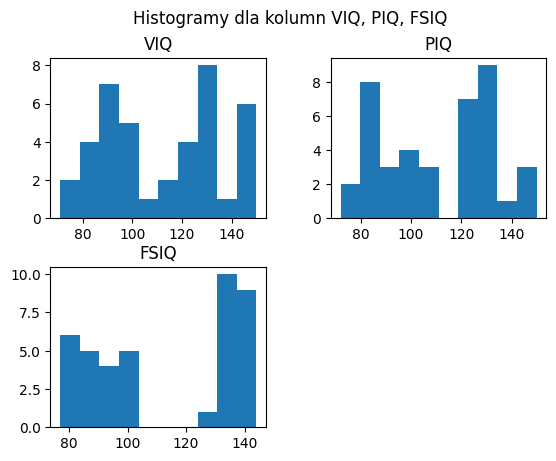

In [49]:
df[['VIQ', 'PIQ', 'FSIQ']].hist(grid=False)
plt.suptitle('Histogramy dla kolumn VIQ, PIQ, FSIQ')
plt.show()

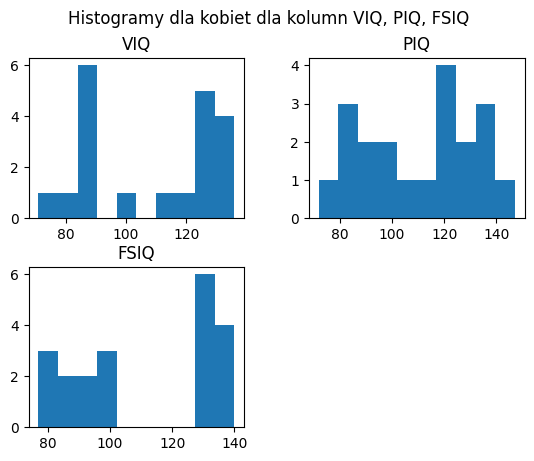

In [50]:
df[df['Gender'] == 'Female'][['VIQ', 'PIQ', 'FSIQ']].hist(grid=False)
plt.suptitle('Histogramy dla kobiet dla kolumn VIQ, PIQ, FSIQ')
plt.show()